A Hovmoller diagram for T (vs longitude 30-100E), for the period 1995-2015 using appropiate frequency for the output

In [1]:
#import modules 
#allows plots to appear beneath cell
%matplotlib notebook 
import numpy as np
import numpy.ma as ma
from matplotlib import *
import netCDF4 as nc4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
from matplotlib import colors, ticker, cm
import matplotlib.patches as mpatches
import cartopy as cart
from mpl_toolkits.basemap import Basemap
import xarray as xrr
from numpy.ma import masked_where
import calendar
import datetime
from matplotlib import dates as mdates
import pandas as pd

In [2]:
#The region is between 30E and 100E, so we need to split the download in
#two slices due to the grid indexes. 
#Also, for both cases we should split in two in the temporal dimension
#due to the different name of some variables since 2013 in advance...

m_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
sst11=np.zeros((120,516,216))
va=0
for i in range(1995,2013): 
    for m in m_list:
        fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/means/'+str(i)+'/ORCA0083-N06_'+str(i)+'m'+str(m)+'T.nc','r',format='NETCDF4')
        sst11_=fyd.variables['sst'][0,1373:1493,3805:4321]
        sst11[:,:,va]=sst11_
        va=va+1

sst12=np.zeros((120,325,216))
va=0
for i in range(1995,2013): 
    for m in m_list:
        fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/means/'+str(i)+'/ORCA0083-N06_'+str(i)+'m'+str(m)+'T.nc','r',format='NETCDF4')
        sst12_=fyd.variables['sst'][0,1373:1493,0:325]
        sst12[:,:,va]=sst12_
        va=va+1

sst11[np.abs(sst11) > 3000.] = np.nan 
sst11[sst11 == 0.] = np.nan
sst12[np.abs(sst12) > 3000.] = np.nan 
sst12[sst12 == 0.] = np.nan

sst_1=np.concatenate((sst11,sst12),axis=1)   #(120, 841, 216)

In [4]:
sst21=np.zeros((120,516,36))
va=0
for i in range(2013,2016): 
    for m in m_list:
        fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/means/'+str(i)+'/ORCA0083-N06_'+str(i)+'m'+str(m)+'T.nc','r',format='NETCDF4')
        sst21_=fyd.variables['tos'][0,1373:1493,3805:4321]
        sst21[:,:,va]=sst21_
        va=va+1

sst22=np.zeros((120,325,36))
va=0
for i in range(2013,2016): 
    for m in m_list:
        fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/means/'+str(i)+'/ORCA0083-N06_'+str(i)+'m'+str(m)+'T.nc','r',format='NETCDF4')
        sst22_=fyd.variables['tos'][0,1373:1493,0:325]
        sst22[:,:,va]=sst22_
        va=va+1

sst21[np.abs(sst21) > 3000.] = np.nan 
sst21[sst21 == 0.] = np.nan
sst22[np.abs(sst22) > 3000.] = np.nan 
sst22[sst22 == 0.] = np.nan

sst_2=np.concatenate((sst21,sst22),axis=1)  #(120, 841, 36)

In [5]:
sst = np.concatenate((sst_1,sst_2),axis=2) #(120, 841, 252)

In [6]:
lonS1=fyd.variables['nav_lon'][1373:1493,3805:4321]       
lonS2=fyd.variables['nav_lon'][1373:1493,0:325] 
lonS=np.concatenate((lonS1,lonS2),axis=1) #(120,841)
lons_m = np.mean(lonS,axis=0)

In [7]:
timee = pd.date_range(start='1/1/1995',end='1/1/2016',freq='M')  #(252)
timee_l=list(timee)

#this is for the tick label in the figure:
years = mdates.YearLocator()   
months = mdates.MonthLocator() 

#this is for the y axis ticks ..
time_i = pd.date_range(start='1994-12-31',end='2016-01-01',freq='6M')

In [ ]:
sst_m=np.nanmean(sst,axis=0)  #(841,252) average through the latitudes axis.
sst_mt=np.transpose(sst_m)

<IPython.core.display.Javascript object>


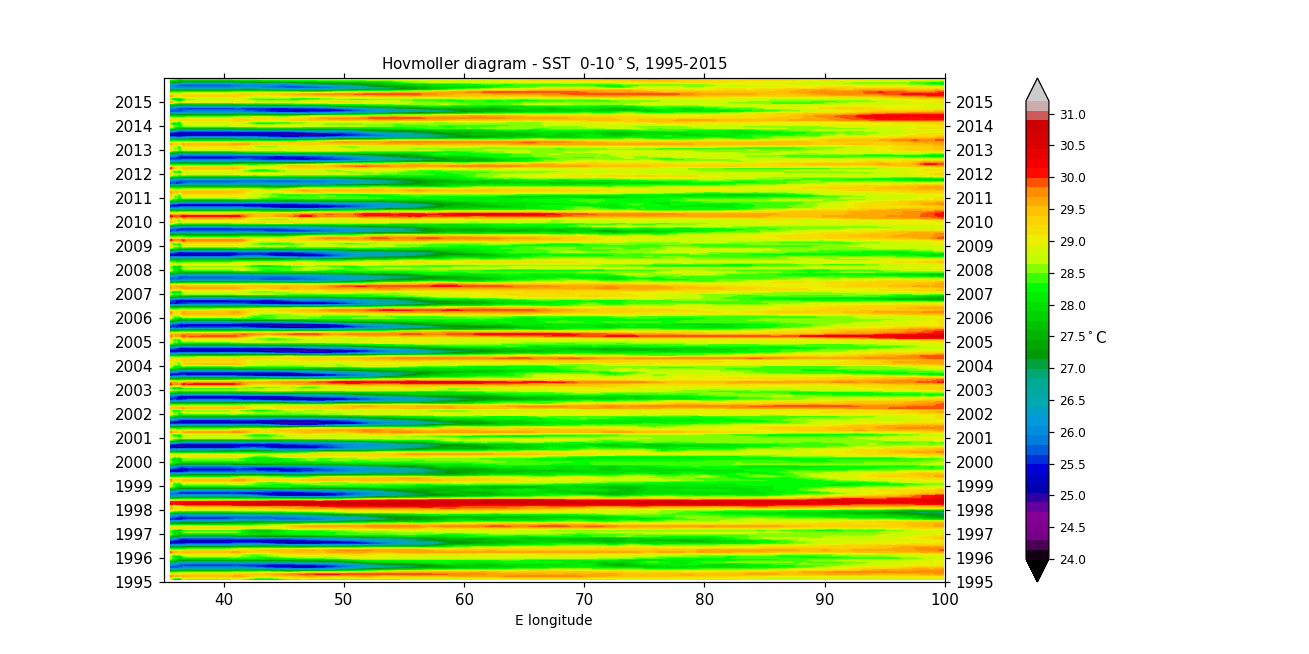

In [17]:
fig , ax = plt.subplots(1,1,figsize=(12,6))

ax = plt.axes()

ticks=[24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31]
low=24
high=31.25
ran=0.15

P1 = ax.contourf(lons_m,timee,sst_mt,np.arange(low, high, ran),xdate=True,
            extend='both',cmap=plt.cm.nipy_spectral)

plt.title('Hovmoller diagram - SST  0-10$^\circ$S, 1995-2015',fontsize=10)
plt.xlim((35,100))
plt.xlabel('E longitude',fontsize=9)

cbar =plt.colorbar(P1,pad=0.08)
cbar.set_ticks(ticks)
cbar.set_label('$^\circ$C',rotation=0,labelpad=6)
font_size=8
cbar.ax.tick_params(labelsize=font_size)

plt.yticks(time_i)

ax.yaxis.set_major_locator(years)
plt.tick_params(top=True,right=True,labelright=True)
#ax.yaxis.set_minor_locator(plt.MultipleLocator)
#ax.yaxis.set_minor_locator(mdates.MonthLocator(interval=6))
#ax.yaxis.set_minor_locator(mdates.DayLocator(interval=183))
